In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import sys
import os
import pandas as pd
from PIL import Image, ImageEnhance
import random

### Making csv from images

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image


In [ ]:
train_path_notumor = "/content/drive/MyDrive/MLProject/Dataset/Training/notumor/"
train_path_glioma = "/content/drive/MyDrive/MLProject/Dataset/Training/glioma/"
train_path_meningioma = "/content/drive/MyDrive/MLProject/Dataset/Training/meningioma/"
train_path_pituitary = "/content/drive/MyDrive/MLProject/Dataset/Training/pituitary/"
train_notumor_imgs = os.listdir(train_path_notumor)
train_glioma_imgs = os.listdir(train_path_glioma)
train_meningioma_imgs = os.listdir(train_path_meningioma)
train_pituitary_imgs = os.listdir(train_path_pituitary)

print(len(train_notumor_imgs))
print(len(train_glioma_imgs))
print(len(train_meningioma_imgs))
print(len(train_pituitary_imgs))

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
img_base_path = "/content/drive/MyDrive/MLProject/Dataset/Training/"

In [ ]:
# Function to extract features from an image
def imgFeatures (path):
  img = image.load_img(path, target_size=(224, 224))
  img = augment_image(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  FlatFeatures = features.ravel()
  return FlatFeatures

In [ ]:
# Extracting features of all images in the class notumor
X = []
i = 0
l = len(train_notumor_imgs)
for name in train_notumor_imgs:
  i+=1
  X.append(imgFeatures(img_base_path+"notumor/"+name))
  print(i,"/",l)
df = pd.DataFrame(X)
df.to_csv("/content/drive/MyDrive/MLProject/Train_notumor.csv")

In [ ]:
# Extracting features of all images in the class glioma
X1 = []
i = 0
l = len(train_glioma_imgs)
for name in train_glioma_imgs:
  i+=1
  X1.append(imgFeatures(img_base_path+"glioma/"+name))
  print(i,"/",l)

df1 = pd.DataFrame(X1)
df1.to_csv("/content/drive/MyDrive/MLProject/Train_glioma.csv")

In [ ]:
# Extracting features of all images in the class meningioma
X2 = []
i = 0
l = len(train_meningioma_imgs)
for name in train_meningioma_imgs:
  i+=1
  X2.append(imgFeatures(img_base_path+"meningioma/"+name))
  print(i,"/",l)

df2 = pd.DataFrame(X2)
df2.to_csv("/content/drive/MyDrive/MLProject/Train_meningioma.csv")

In [ ]:
# Extracting features of all images in the class pituitary
X3 = []
i = 0
l = len(train_pituitary_imgs)
for name in train_pituitary_imgs:
  i+=1
  X3.append(imgFeatures(img_base_path+"pituitary/"+name))
  print(i,"/",l)

df3 = pd.DataFrame(X3)
df3.to_csv("/content/drive/MyDrive/MLProject/Train_pituitary.csv")

### Reading features from saved csv

In [ ]:
df_notumor = pd.read_csv('/content/drive/MyDrive/MLProject/Train_notumor.csv')


In [ ]:
df_glioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_glioma.csv')


In [ ]:
df_meningioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_meningioma.csv')


In [ ]:
df_pituitary = pd.read_csv('/content/drive/MyDrive/MLProject/Train_pituitary.csv')


In [ ]:
print(df_notumor.shape)
print(df_glioma.shape)
print(df_meningioma.shape)
print(df_pituitary.shape)

(1595, 25089)
(1321, 25089)
(1339, 25089)
(1457, 25089)


## Making Dataset

In [ ]:
# Making labels
lst1 = [0 for i in range(1595)]
lst2 = [1 for i in range(1321)]
lst3 = [2 for i in range(1339)]
lst4 = [3 for i in range(1457)]
lst = lst1+lst2+lst3+lst4
df_labels = pd.DataFrame(lst)
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
5707,3
5708,3
5709,3
5710,3


In [ ]:
# Combine test data
df_combined_test = pd.DataFrame()
df_combined_test=df_combined_test.append(df_notumor,ignore_index=True)
df_combined_test=df_combined_test.append(df_glioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_meningioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_pituitary,ignore_index=True)

# Remove "Unnamed" column
df_combined_test = df_combined_test.loc[:, ~df_combined_test.columns.str.contains('^Unnamed')]

#Print
df_combined_test

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.543054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.408488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.360194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.505567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.410697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.525596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.526904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.451308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.565613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

|params|shape|
|---|---|
|`n_components = 0.85`|5712 rows × 32 columns|
|`n_components = 0.9`|5712 rows × 56 columns|
|`n_components = 0.97`|5712 rows × 171 columns|

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_combined_test = scaler.fit_transform(df_combined_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.97)
pca.fit(df_combined_test)
df_combined_testN = pca.transform(df_combined_test)

In [ ]:
df_combined_testN = pd.DataFrame(df_combined_testN)
df_combined_testN

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-0.977598,0.406462,0.082781,0.136262,0.088426,0.056538,-0.180663,-0.140821,0.052719,0.057425,...,0.006614,-0.022277,0.026784,-0.010601,0.030781,-0.016082,0.001874,-0.005495,-0.014846,0.011197
1,9.515231,3.640315,2.986292,-0.527495,0.758320,0.383084,1.768984,0.225610,1.010280,-0.710214,...,-0.034805,0.002329,0.025040,-0.014101,0.020138,-0.065794,0.069311,-0.034678,-0.015145,0.052647
2,10.009582,-2.245851,4.967486,4.133888,3.024329,1.319238,-1.400171,0.581279,-0.270583,-0.356254,...,0.055674,-0.171621,-0.064973,0.107218,-0.013264,0.024463,0.125453,-0.306954,0.077876,-0.210596
3,1.545290,-1.959710,-0.541500,0.618708,0.134994,-0.390314,0.889452,-0.456495,-0.028909,0.360724,...,0.057581,0.054020,-0.081935,0.026931,-0.008664,-0.047832,-0.045753,0.101923,-0.028338,-0.045544
4,3.398167,0.947748,-2.416032,-0.592679,0.317147,-0.324209,-0.264866,0.153352,-0.269813,-0.336363,...,0.043705,-0.114292,-0.000024,-0.043946,-0.052050,-0.222910,0.167529,-0.073085,-0.039755,0.084696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,-0.926472,0.012849,0.248405,0.175305,-0.111061,0.230390,0.218801,0.031269,-0.244547,0.036365,...,0.043120,0.062026,0.055184,0.015940,0.006543,0.027933,0.012165,-0.002622,0.011853,0.022258
5708,-0.487789,0.080241,-0.426579,0.029778,0.362217,-0.188060,0.184952,0.067692,-0.005741,0.155261,...,-0.032694,-0.027579,0.036147,0.007709,-0.011933,0.006018,-0.019333,0.006043,0.008559,0.053569
5709,0.014970,-0.853089,-0.001690,-0.799090,-0.426564,-0.247261,0.373410,0.790633,-0.166972,0.101324,...,0.022876,-0.028665,-0.005650,-0.072686,0.041669,0.003219,0.030900,-0.004582,-0.004398,-0.014199
5710,-1.017236,0.293702,0.235519,0.125037,-0.053320,0.104678,-0.108140,-0.009941,-0.032104,-0.054014,...,-0.017629,0.002504,0.029764,0.007681,0.000830,0.002449,-0.015546,-0.011763,-0.009875,0.009085


### Data Pre-processing

In [ ]:
""" Normalise """
scaler = MinMaxScaler()
scaler.fit(df_combined_test)
df_combined_test = pd.DataFrame(scaler.transform(df_combined_test))
df_combined_test


In [ ]:
## Reducing the features using variance threshold
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
print(df_combined_testNparray)
df_combined_testN = pd.DataFrame(df_combined_testNparray)
df_combined_testN

[[0.         0.         0.         ... 1.5266256  0.         7.543054  ]
 [0.         0.         0.         ... 1.1181698  0.         7.408488  ]
 [0.         0.22182286 0.         ... 0.6407356  0.         7.3601937 ]
 ...
 [0.         0.         0.         ... 1.3416522  0.         7.451308  ]
 [0.         0.         0.         ... 1.4519796  0.         7.565613  ]
 [0.         0.         0.         ... 1.487973   0.         7.561774  ]]


,0,1,2,3,4,5,6,7,8,9,...,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436
0,0.0,0.000000,0.0,0.0,18.215310,0.000000,4.808786,0.0,9.202119,27.902569,...,29.389982,2.586078,0.000000,65.591270,3.239064,0.0,0.000000,1.526626,0.0,7.543054
1,0.0,0.000000,0.0,0.0,18.284573,0.083937,4.889889,0.0,9.165128,28.318600,...,28.974077,2.356085,0.000000,66.160600,4.119299,0.0,0.000000,1.118170,0.0,7.408488
2,0.0,0.221823,0.0,0.0,20.086786,0.374243,4.788596,0.0,9.415787,29.095660,...,28.618310,2.293304,1.033841,67.137440,4.070102,0.0,0.000000,0.640736,0.0,7.360194
3,0.0,0.000000,0.0,0.0,19.042976,0.363327,5.064434,0.0,7.979835,28.166897,...,29.402967,2.467926,0.137639,65.965750,3.123997,0.0,0.005582,1.400193,0.0,7.505567
4,0.0,0.756483,0.0,0.0,19.597971,0.170522,4.838222,0.0,6.749639,26.750816,...,29.296143,2.483115,0.000000,65.802880,3.635429,0.0,0.000000,1.513412,0.0,7.410697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.000000,0.0,0.0,18.349247,0.000000,4.965715,0.0,8.679968,27.893862,...,29.505701,2.353112,0.000000,65.908350,3.209782,0.0,0.050954,1.430862,0.0,7.525596
5708,0.0,0.000000,0.0,0.0,18.231503,0.000000,4.831993,0.0,9.165584,27.945850,...,29.383936,2.554564,0.000000,65.646830,3.244176,0.0,0.000000,1.485207,0.0,7.526904
5709,0.0,0.000000,0.0,0.0,18.326937,0.040929,4.875112,0.0,9.029345,28.068222,...,29.578619,2.480039,0.000000,65.924780,3.242327,0.0,0.000000,1.341652,0.0,7.451308
5710,0.0,0.000000,0.0,0.0,18.224184,0.000000,4.815870,0.0,9.185477,27.929220,...,29.439388,2.461369,0.000000,65.758750,3.151620,0.0,0.000000,1.451980,0.0,7.565613


### Read/Write

In [ ]:
# df_combined_testN,df_labels
df_combined_testN.to_csv("/content/drive/MyDrive/MLProject/df_combined_testN.csv")
df_labels.to_csv("/content/drive/MyDrive/MLProject/df_labels.csv")

In [ ]:
df_combined_testN=pd.read_csv("/content/drive/MyDrive/MLProject/df_combined_testN.csv")
df_labels=pd.read_csv("/content/drive/MyDrive/MLProject/df_labels.csv")

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_testN,df_labels,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4284, 2437)
(4284, 1)
(1428, 2437)
(1428, 1)


In [ ]:
#For printing reports for the model
def print_reports(model):
  predictedy_test=model.predict(X_test)
  conf_mat = confusion_matrix(y_test, predictedy_test)
  acc_scr = accuracy_score(y_test, predictedy_test)
  print("Accuracy Score = ",acc_scr)
  print("clf rprt =\n",classification_report(y_test,predictedy_test))
  print("\nConfusion Matrix")
  disp=ConfusionMatrixDisplay(conf_mat)
  disp.plot()
  return predictedy_test

### Decision tree clf

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.001|0.7107843137254902|
|Normalized, var thresh = 0.01|0.6904761904761905|
|var thresh = 0|0.7072829131652661|
|PCA 0.85|0.6701680672268907|
|PCA 0.9|0.6897759103641457|
|PCA 0.97|0.6624649859943977|



Accuracy Score =  0.6624649859943977
clf rprt =
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       408
           1       0.64      0.57      0.60       332
           2       0.51      0.57      0.54       328
           3       0.71      0.73      0.72       360

    accuracy                           0.66      1428
   macro avg       0.66      0.66      0.66      1428
weighted avg       0.67      0.66      0.66      1428


Confusion Matrix


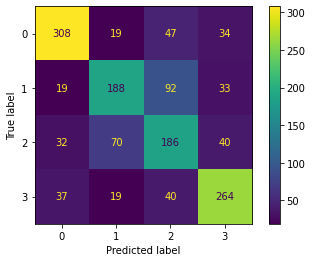

In [ ]:
#Create an instance of decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=0)

#fit the model
clf_dt.fit(X_train,y_train.values.ravel())

#print report
print_reports(clf_dt)

### Random Forest

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8172268907563025|
|Normalized, var thresh = 0.001|0.8333333333333334|
|var thresh = 0|0.8361344537815126|
|PCA 0.85|0.7822128851540616|
|PCA 0.9|0.7976190476190477|
|PCA 0.97|0.8053221288515406|


Accuracy Score =  0.8053221288515406
clf rprt =
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       408
           1       0.80      0.73      0.76       332
           2       0.73      0.59      0.65       328
           3       0.82      0.93      0.87       360

    accuracy                           0.81      1428
   macro avg       0.80      0.79      0.79      1428
weighted avg       0.80      0.81      0.80      1428


Confusion Matrix


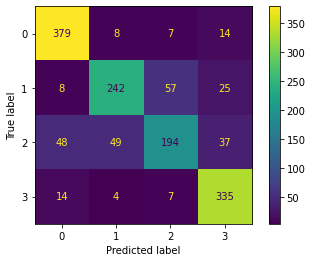

In [ ]:
#Create an instance of random forest classifier
clf_rf = RandomForestClassifier(random_state=0)

#fit the model
clf_rf.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf)

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.001|0.8375350140056023|
|Normalized, var thresh = 0.01|0.8298319327731093|
|var thresh = 0|0.8403361344537815|
|PCA 0.85|0.780812324929972|
|PCA 0.9|0.7997198879551821|
|PCA 0.97|**0.822829131652661**|


Accuracy Score =  0.8403361344537815
clf rprt =
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       408
           1       0.83      0.78      0.80       332
           2       0.76      0.63      0.69       328
           3       0.84      0.97      0.90       360

    accuracy                           0.84      1428
   macro avg       0.83      0.83      0.83      1428
weighted avg       0.84      0.84      0.84      1428


Confusion Matrix


array([1, 0, 2, ..., 0, 3, 3])

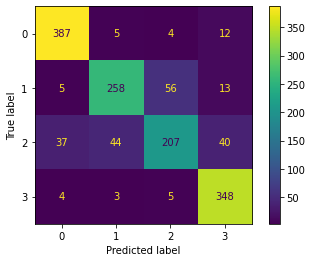

In [ ]:
#Create an instance of random forest classifier
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)

#fit the model
clf_rf1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=entropy, n_estimators=220, random_state=0;, score=0.835 total time=  14.0s
[CV 2/5] END criterion=entropy, n_estimators=220, random_state=0;, score=0.858 total time=  13.6s
[CV 3/5] END criterion=entropy, n_estimators=220, random_state=0;, score=0.835 total time=  13.7s
[CV 4/5] END criterion=entropy, n_estimators=220, random_state=0;, score=0.846 total time=  13.5s
[CV 5/5] END criterion=entropy, n_estimators=220, random_state=0;, score=0.822 total time=  16.2s
[CV 1/5] END criterion=entropy, n_estimators=110, random_state=0;, score=0.831 total time=   6.8s
[CV 2/5] END criterion=entropy, n_estimators=110, random_state=0;, score=0.847 total time=   6.8s
[CV 3/5] END criterion=entropy, n_estimators=110, random_state=0;, score=0.839 total time=   6.9s
[CV 4/5] END criterion=entropy, n_estimators=110, random_state=0;, score=0.845 total time=   6.9s
[CV 5/5] END criterion=entropy, n_estimators=110, random_s

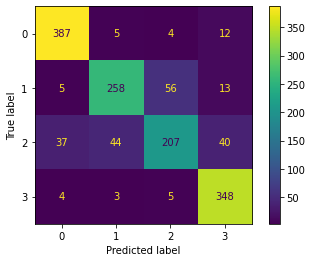

In [ ]:
pram_grid = {'random_state': [0], 'criterion':['entropy','gini'],'n_estimators': [220,110,330,55]}
est = RandomForestClassifier()

clf = GridSearchCV(est, pram_grid,verbose=3)
clf.fit(X_train, y_train.values.ravel())


print(clf.best_params_)
gscv_rfc = RandomForestClassifier(**clf.best_params_).fit(X_train, y_train.values.ravel())
print_reports(gscv_rfc)

### SVM

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.001|0.8249299719887955|
|Normalized, var thresh = 0.01|0.7878151260504201|
|var thresh = 0|**0.8501400560224089**|
|PCA 0.85|0.7058823529411765|
|PCA 0.9|0.7401960784313726|
|PCA 0.97|0.7836134453781513|



Accuracy Score =  0.7836134453781513
clf rprt =
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       408
           1       0.73      0.77      0.75       332
           2       0.65      0.51      0.57       328
           3       0.82      0.93      0.87       360

    accuracy                           0.78      1428
   macro avg       0.77      0.77      0.77      1428
weighted avg       0.78      0.78      0.78      1428


Confusion Matrix


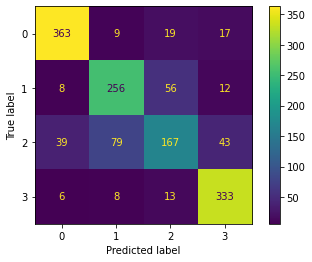

In [ ]:
#Create an instance of svm
svm_model1 = SVC(kernel = "linear", C=2.2)

#fit the model
svm_model1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(svm_model1)

### ExtraTreesClassifier

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.001|0.842436974789916|
|var thresh = 0|0.8410364145658263|
|PCA 0.85|0.8074229691876751|
|PCA 0.9|0.8102240896358543|
|PCA 0.97|**0.8277310924369747**|


Accuracy Score =  0.8277310924369747
clf rprt =
               precision    recall  f1-score   support

           0       0.85      0.95      0.89       408
           1       0.82      0.77      0.79       332
           2       0.77      0.63      0.69       328
           3       0.85      0.93      0.89       360

    accuracy                           0.83      1428
   macro avg       0.82      0.82      0.82      1428
weighted avg       0.82      0.83      0.82      1428


Confusion Matrix


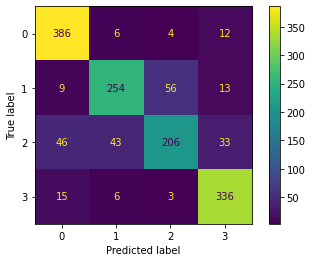

In [ ]:
#Create an instance of Extra Trees Classifier
ExtraTreesClassifier_m = ExtraTreesClassifier()

#fit the model
ExtraTreesClassifier_m.fit(X_train,y_train.values.ravel())

#Print Report
print_reports(ExtraTreesClassifier_m)

### AdaBoostClassifier

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.001|0.7009803921568627|
|var thresh = 0|0.7009803921568627|
|PCA 0.85|0.5980392156862745|
|PCA 0.9|0.6498599439775911|
|PCA 0.97|0.6442577030812325|


Accuracy Score =  0.6442577030812325
clf rprt =
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       408
           1       0.60      0.71      0.65       332
           2       0.43      0.34      0.38       328
           3       0.74      0.74      0.74       360

    accuracy                           0.64      1428
   macro avg       0.63      0.64      0.63      1428
weighted avg       0.64      0.64      0.64      1428


Confusion Matrix


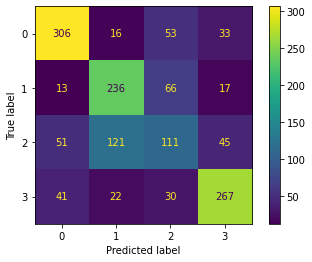

In [ ]:
#Create an instance of AdaBoost
AdaBoostClassifier_model = AdaBoostClassifier()

#fit the model
AdaBoostClassifier_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(AdaBoostClassifier_model)

### Naïve Bayes

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.001|0.37745098039215685|
|var thresh = 0|0.3711484593837535|
|PCA 0.85|0.45588235294117646|
|PCA 0.9|0.46568627450980393|
|PCA 0.97|0.45168067226890757|


Accuracy Score =  0.45168067226890757
clf rprt =
               precision    recall  f1-score   support

           0       0.67      0.50      0.58       408
           1       0.36      0.82      0.50       332
           2       0.32      0.18      0.23       328
           3       0.59      0.31      0.40       360

    accuracy                           0.45      1428
   macro avg       0.49      0.45      0.43      1428
weighted avg       0.50      0.45      0.43      1428


Confusion Matrix


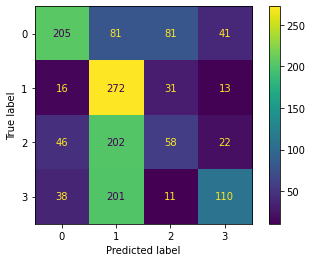

In [ ]:
#Create an instance of Gaussian Naive Bayes
GaussianNB_model = GaussianNB()

#fit the model
GaussianNB_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(GaussianNB_model)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
svm_model1 = SVC(kernel = "linear", C=2.2)
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)
GaussianNB_model = GaussianNB()
AdaBoostClassifier_model = AdaBoostClassifier()


In [ ]:
print("SVM vs AdaBoost")
t, p = paired_ttest_5x2cv(estimator1=AdaBoostClassifier_model, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')
 
print("SVM vs Guassian")
t, p = paired_ttest_5x2cv(estimator1=GaussianNB_model, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

SVM vs Guassian
t statistic: -15.168590290032263, p-value: 2.2571685491626944e-05

Difference between mean performance is probably real
SVM vs Guassian
t statistic: -23.45097191713894, p-value: 2.62467520615573e-06

Difference between mean performance is probably real


In [ ]:
print("SVM vs Random")
t, p = paired_ttest_5x2cv(estimator1=clf_rf1, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

SVM vs Guassian
t statistic: 1.548004953623768, p-value: 0.18229936711089872

Algorithms probably have the same performance


5x2 CV Paired t-test
t statistic: 1.548004953623768, p-value: 0.18229936711089872